In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape


(5572, 5)

###  Steps
  - Data Cleaning
  - EDA
  - Text Preprocessing
  - Model Building
  - evalution
  - improvement
  - building website
  - deploy
  
  

## 1 . Data cleaning

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 column
df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 3'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renamig The Columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### fit_transform

This method performs fit and transform on the input data at a single time and converts the data points. If we use fit and transform separate when we need both then it will decrease the efficiency of the model so we use fit_transform() which will do both the work.

#### Label encoder
LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [11]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for dulicate value
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.shape

(5169, 2)

In [16]:
df_cpy = df.copy()

## 2.Exploratory Data Analysis

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

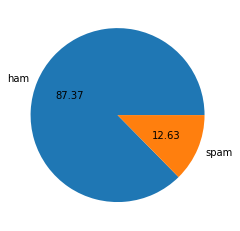

In [19]:
%matplotlib inline
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Conclusion : data is imbalance 

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Creating new column of length of character in text
df['num_charcters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_charcters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# finding number of ords in  text
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_charcters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_charcters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,target,num_charcters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [27]:
# describe for ham messages
df[df['target']==0].describe()

,target,num_charcters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [28]:
# describe for spam messages
df[df['target']==1].describe()

,target,num_charcters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


By Comparing the spam and ham describe :-

conclusion: spam msg has greater length of charcters than ham msg

In [29]:
import seaborn as sns

Comapring number of charcters

<AxesSubplot:xlabel='num_charcters', ylabel='Count'>

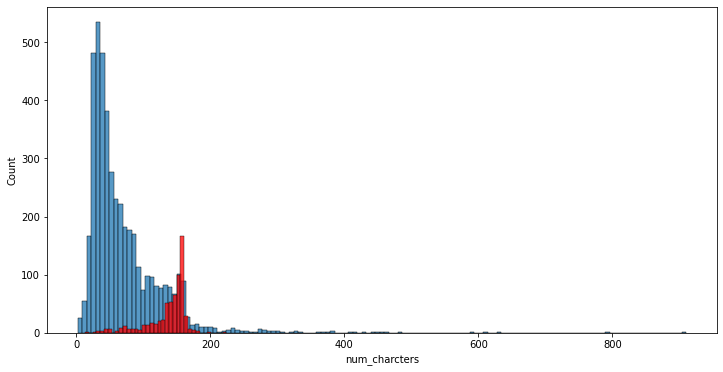

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charcters'])
sns.histplot(df[df['target']==1]['num_charcters'],color='red')

Comparing number of words


<AxesSubplot:xlabel='num_words', ylabel='Count'>

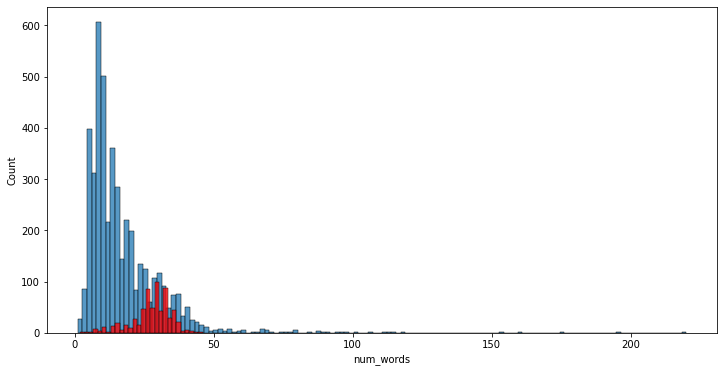

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

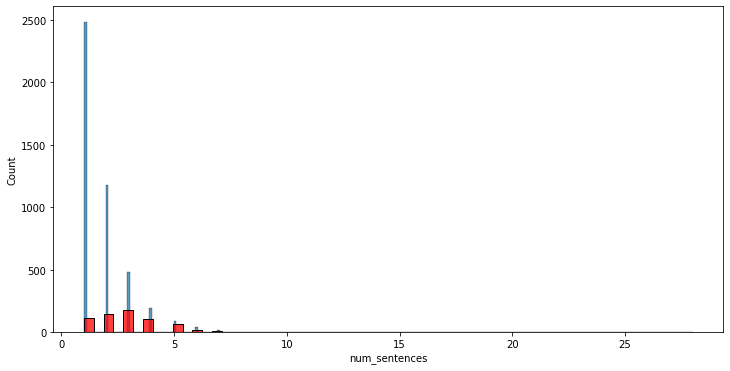

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

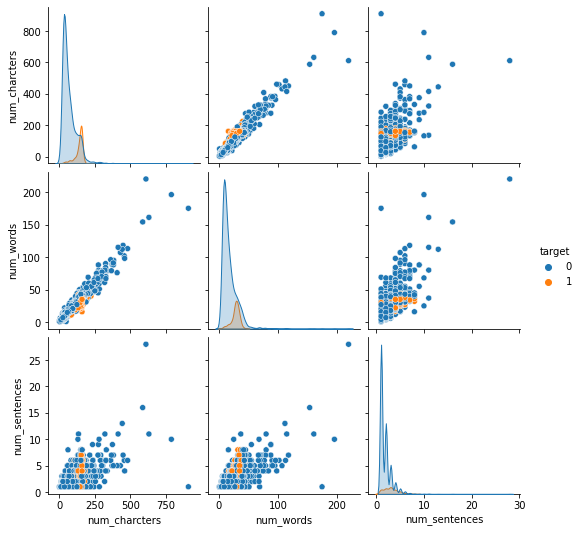

In [33]:
# how columns are realted to each other
sns.pairplot(df,hue='target')

<AxesSubplot:>

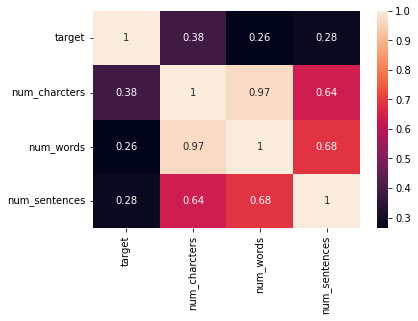

In [34]:
sns.heatmap(df.corr(),annot=True)

## 3. Data preprocessing 
    -Lower case
    -tokenization
    -Removig special character
    -Removing stop word and punctuation
    -Stemming

In [35]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# Stop words in nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
#punctuation mark
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
# stemming 
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()
ps.stem('dancing')


'danc'

In [39]:
def transform_text(text):
    
    text=text.lower() #lowercase
    text=nltk.word_tokenize(text) #tokenization
    
    #Removig special character
    temp=[]
    for i in text :
        if i.isalnum():
            temp.append(i)
            
    #copyng list
    text=temp[:]
    temp.clear()
    
    # Removing stop word and punctuation

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            temp.append(i)
    
    #copyng list
    text=temp[:]
    temp.clear()
    
    #stemming
    for i in text:
        temp.append(ps.stem(i))
    
    
    return " ".join(temp) 
    

In [40]:
transform_text("hello, guys my name is sejal ,i got 98 % and i have 3$,i am loving dancing")

'hello guy name sejal got 98 3 love danc'

In [41]:
# creating new column
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_charcters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

### Balancing Dataset

In [44]:
# Undersampling
df_0 = df[df['target']==0].sample(n=653)
df_1 = df[df['target']==1]

df_new = pd.concat([df_0, df_1])
df_new = df_new.sample(frac=1).reset_index()

In [45]:
df = df_new

In [46]:
# using wordcloud which help to highlight important words 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [47]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

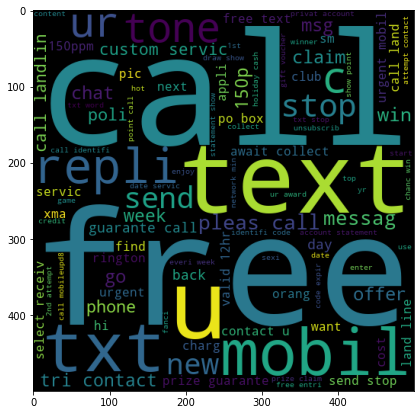

In [48]:
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

In [49]:
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

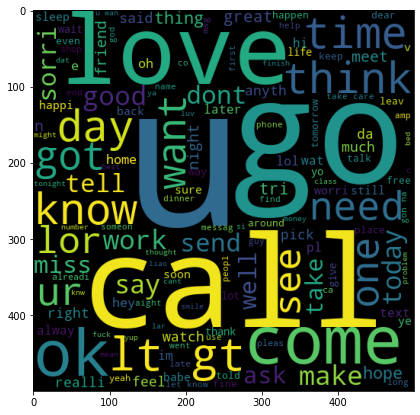

In [50]:
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

In [51]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)
        

In [52]:
len(spam_corpus)
spam_corpus

['want',
 '750',
 'anytim',
 'network',
 'min',
 '150',
 'text',
 'new',
 'video',
 'phone',
 'five',
 'pound',
 'per',
 'week',
 'call',
 '08002888812',
 'repli',
 'deliveri',
 'tomorrow',
 'uniqu',
 'user',
 'id',
 'remov',
 'send',
 'stop',
 '87239',
 'custom',
 'servic',
 '08708034412',
 '500',
 'new',
 'mobil',
 '2004',
 'must',
 'go',
 'txt',
 'nokia',
 '89545',
 'collect',
 'today',
 '2optout',
 'txtauction',
 'u',
 'win',
 'music',
 'gift',
 'voucher',
 'everi',
 'week',
 'start',
 'txt',
 'word',
 'draw',
 '87066',
 'tsc',
 'skillgam',
 '1winaweek',
 'age16',
 '150ppermesssubscript',
 'win',
 'shop',
 'spree',
 'everi',
 'week',
 'start',
 '2',
 'play',
 'text',
 'store',
 'skilgm',
 'tscs08714740323',
 '1winawk',
 'age16',
 'eeri',
 'nokia',
 'tone',
 '4u',
 'rpli',
 'tone',
 'titl',
 '8007',
 'eg',
 'tone',
 'dracula',
 '8007',
 'titl',
 'ghost',
 'addamsfa',
 'munster',
 'exorcist',
 'twilight',
 'pobox36504w45wq',
 '150p',
 'wan',
 'na',
 'get',
 'laid',
 '2nite',
 'want',

In [53]:
from collections import Counter
df1=pd.DataFrame(Counter(spam_corpus).most_common(30))

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'nokia'),
  Text(19, 0, 'urgent'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'min'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'c')])

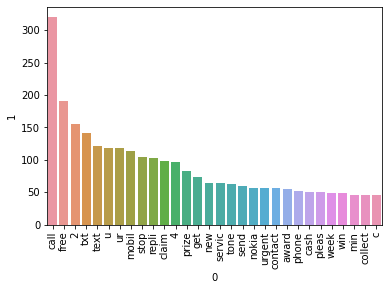

In [54]:
# plot dataframe of common words
sns.barplot(df1[0],df1[1])
plt.xticks(rotation='vertical')

## 4.Model building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [56]:
X=tfidf.fit_transform (df['transformed_text']).toarray()

In [57]:
X.shape

(1306, 3438)

In [58]:
y=df['target'].values
y

array([1, 0, 1, ..., 0, 1, 0])

In [59]:
from sklearn.model_selection import train_test_split


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.9122137404580153
[[117   9]
 [ 14 122]]
0.9312977099236641


In [64]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9351145038167938
[[123   9]
 [  8 122]]
0.9312977099236641


In [65]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(precision_score(y_pred3,y_test))

0.9465648854961832
[[131  14]
 [  0 117]]
0.8931297709923665


In [66]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier


In [67]:

mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)


In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(mnb,X_train,y_train,X_test,y_test)


(0.9351145038167938, 0.9384615384615385)

In [70]:
train_classifier(rfc,X_train,y_train,X_test,y_test)


(0.9465648854961832, 0.9915966386554622)

In [71]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [72]:
df['target'].value_counts()

1    653
0    653
Name: target, dtype: int64

In [73]:
df_new[df['target']==0]

,index,target,text,num_charcters,num_words,num_sentences,transformed_text
1,2392,0,"Thanks da thangam, i feel very very happy dear...",67,17,2,thank da thangam feel happi dear also miss da
3,4052,0,I was slept that time.you there?,32,7,1,slept
6,1649,0,ITS A LAPTOP TAKE IT WITH YOU.,30,8,1,laptop take
8,3719,0,"Yeah why not, is the gang all ready",35,9,1,yeah gang readi
11,3981,0,His frens go then he in lor. Not alone wif my ...,60,17,2,fren go lor alon wif mum n si lor
...,...,...,...,...,...,...,...
1296,1676,0,"Yeah, that's fine! It's å£6 to get in, is that...",51,17,2,yeah fine get ok
1297,476,0,Love you aathi..love u lot..,28,8,1,love aathi love u lot
1300,2155,0,What year. And how many miles.,30,8,2,year mani mile
1303,4999,0,Well its not like you actually called someone ...,78,16,2,well like actual call someon punto woulda wors
